| **Inicio** | **atrás 1** | **Siguiente 3** |
|----------- |-------------- |---------------|
| [🏠](../../../README.md) | [⏪](./1.TEOREMA_DE_BAYES.ipynb)| [⏩](./3.OPERACIONES_BAYESIANAS.ipynb)|

# **2. ESTIMACIÓN BAYESIANA**

## **Distribución binomial**

La distribución binomial es una distribución de probabilidad discreta que modela el número de éxitos en una secuencia de ensayos independientes y con dos resultados posibles: éxito y fracaso. Es ampliamente utilizada para analizar experimentos donde se cuenta el número de éxitos en un número fijo de ensayos.

La distribución binomial se caracteriza por dos parámetros:

1. **El número de ensayos (n):** Indica cuántas veces se realiza el experimento.

2. **La probabilidad de éxito en cada ensayo (p):** Representa la probabilidad de que ocurra un éxito en un solo ensayo.

La función de masa de probabilidad de la distribución binomial se puede calcular utilizando la fórmula:

$P(X = k) = C(n, k) * p^k * (1-p)^{n-k}$

Donde:

* $P(X = k)$ es la probabilidad de obtener exactamente $k$ éxitos en $n$ ensayos.
* $C(n, k)$ es el coeficiente binomial, que representa el número de formas de seleccionar $k$ éxitos de $n$ ensayos y se calcula como $C(n, k) = n! / (k! * (n-k)!)$.
* $p^k$ es la probabilidad de obtener $k$ éxitos.
* $(1-p)^{n-k}$ es la probabilidad de obtener $(n-k)$ fracasos.

En Python, podemos utilizar la biblioteca `scipy.stats` para trabajar con la distribución binomial. A continuación, se muestra un ejemplo de cómo generar una distribución binomial y graficar su función de masa de probabilidad:

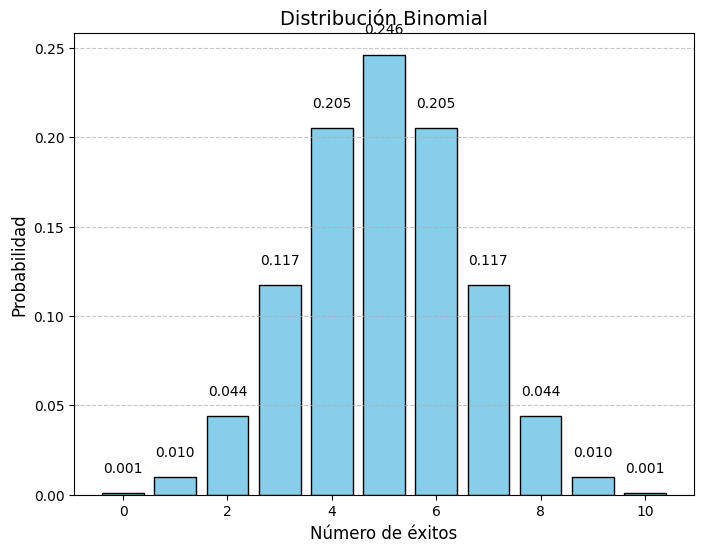

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n = 10  # Número de ensayos
p = 0.5  # Probabilidad de éxito

# Generar una distribución binomial
dist_binomial = binom(n, p)

# Calcular la función de masa de probabilidad para los valores del 0 al n
x = np.arange(0, n+1)
pmf_values = dist_binomial.pmf(x)

# Personalizar el gráfico
plt.figure(figsize=(8, 6))  # Cambiar el tamaño del gráfico

# Cambiar colores y añadir bordes a las barras
plt.bar(x, pmf_values, color='skyblue', edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('Número de éxitos', fontsize=12)
plt.ylabel('Probabilidad', fontsize=12)
plt.title('Distribución Binomial', fontsize=14)

# Añadir etiquetas en las barras
for i, value in enumerate(pmf_values):
    plt.text(x[i], value + 0.01, f'{value:.3f}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir líneas de malla horizontal
plt.show()

En este ejemplo, definimos $n$ como 10 y $p$ como 0.5, lo que significa que estamos realizando 10 ensayos independientes con una probabilidad de éxito del 50%. Luego, generamos una distribución binomial utilizando $binom(n, p)$ y calculamos la función de masa de probabilidad $(pmf)$ para los valores del 0 al 10. Finalmente, graficamos la función de masa de probabilidad utilizando un diagrama de barras.

La gráfica resultante muestra la distribución de probabilidad para el número de éxitos en los 10 ensayos. Puedes ajustar los valores de $n$ y $p$ según tus necesidades y observar cómo cambia la distribución binomial.

![Distribución binomial](../img/Distribuci%C3%B3n%20binomial.png "Distribución binomial")

## **Estimación de proporciones**

La estimación de proporciones es un proceso estadístico que se utiliza para estimar la proporción o porcentaje de una característica específica en una población, utilizando información de una muestra. Es útil cuando queremos hacer inferencias sobre la proporción de una población basándonos en los datos recopilados en una muestra aleatoria.

Supongamos que queremos estimar la proporción de individuos en una población que tienen una determinada característica (por ejemplo, el porcentaje de votantes que apoyan a un determinado candidato). La estimación de proporciones nos permite calcular un intervalo de confianza para la proporción poblacional o realizar pruebas de hipótesis sobre dicha proporción.

Para ilustrar el proceso, aquí tienes un ejemplo de cómo realizar una estimación de proporciones en Python:

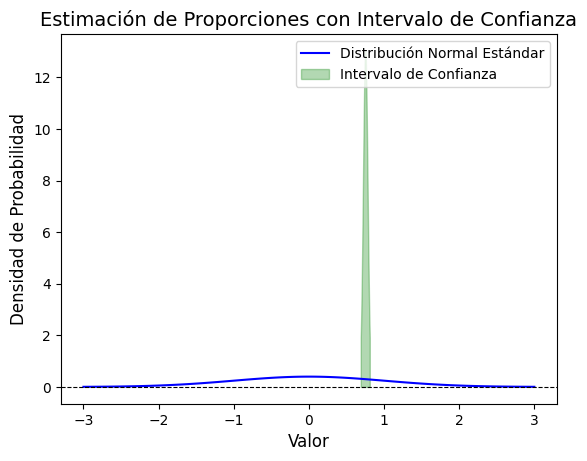

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Datos de la muestra
n = 200  # Tamaño de la muestra
x = 150  # Número de éxitos (individuos con la característica)

# Estimación de proporciones
p_hat = x / n  # Proporción muestral estimada

# Intervalo de confianza
alpha = 0.05  # Nivel de confianza del 95%
z_critical = norm.ppf(1 - alpha/2)  # Valor crítico de la distribución normal estándar

# Cálculo del intervalo de confianza
lower_bound = p_hat - z_critical * np.sqrt((p_hat * (1 - p_hat)) / n)
upper_bound = p_hat + z_critical * np.sqrt((p_hat * (1 - p_hat)) / n)

# Gráfica de la distribución normal estándar
x_axis = np.linspace(-3, 3, 100)
y_axis = norm.pdf(x_axis, 0, 1)
plt.plot(x_axis, y_axis, 'b-', label='Distribución Normal Estándar')

# Área bajo la curva correspondiente al intervalo de confianza
x_fill = np.linspace(lower_bound, upper_bound, 100)
y_fill = norm.pdf(x_fill, p_hat, np.sqrt((p_hat * (1 - p_hat)) / n))
plt.fill_between(x_fill, y_fill, 0, alpha=0.3, color='g', label='Intervalo de Confianza')

# Personalizar la gráfica
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Densidad de Probabilidad', fontsize=12)
plt.title('Estimación de Proporciones con Intervalo de Confianza', fontsize=14)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Línea horizontal en y=0
plt.legend()

plt.show()

En este ejemplo, se considera una muestra aleatoria de tamaño `n = 200`, donde `x = 150` individuos tienen la característica de interés. Primero, calculamos la proporción muestral estimada $p_hat = x / n$. Luego, calculamos un intervalo de confianza del 95% utilizando la distribución normal estándar. Para esto, utilizamos el valor crítico correspondiente a un nivel de confianza del 95%, que se obtiene mediante la función `norm.ppf()` de la biblioteca scipy.stats.

Finalmente, graficamos la distribución normal estándar y sombreamos el área correspondiente al intervalo de confianza estimado.

El resultado de la ejecución del código proporcionará la proporción estimada y el intervalo de confianza correspondiente. La gráfica muestra la distribución normal estándar y el área sombreada que representa el intervalo de confianza estimado.

Recuerda que la estimación de proporciones nos permite hacer inferencias sobre la proporción de una población utilizando información de una muestra. El intervalo de confianza nos da una estimación del rango plausible de valores para la proporción poblacional, mientras que las pruebas de hipótesis nos permiten evaluar si una proporción estimada difiere significativamente de un valor hipotético.

## **Estimación bayesiana**

La estimación bayesiana es un enfoque estadístico que utiliza el teorema de Bayes para obtener estimaciones de los parámetros desconocidos de un modelo, teniendo en cuenta tanto los datos observados como la información previa o conocimiento a priori sobre los parámetros. A diferencia de la estimación clásica, que se basa únicamente en los datos observados, la estimación bayesiana incorpora información previa para actualizar las creencias iniciales y obtener una distribución posterior sobre los parámetros.

El proceso de estimación bayesiana se puede resumir en los siguientes pasos:

1. **Especificación del modelo:** Se define un modelo probabilístico que describe la relación entre los datos observados y los parámetros desconocidos. Esto implica especificar una distribución prior sobre los parámetros.

2. **Actualización de la distribución prior:** Utilizando los datos observados, se actualiza la distribución prior mediante el teorema de Bayes, obteniendo una distribución posterior sobre los parámetros. La distribución posterior representa la información actualizada después de haber observado los datos.

3. **Obtención de las estimaciones:** A partir de la distribución posterior, se pueden obtener distintas estimaciones de los parámetros, como la media, la mediana o los intervalos de credibilidad.

4. **Evaluación de la incertidumbre:** La distribución posterior también permite cuantificar la incertidumbre en las estimaciones, ya que refleja la variabilidad en los posibles valores de los parámetros.

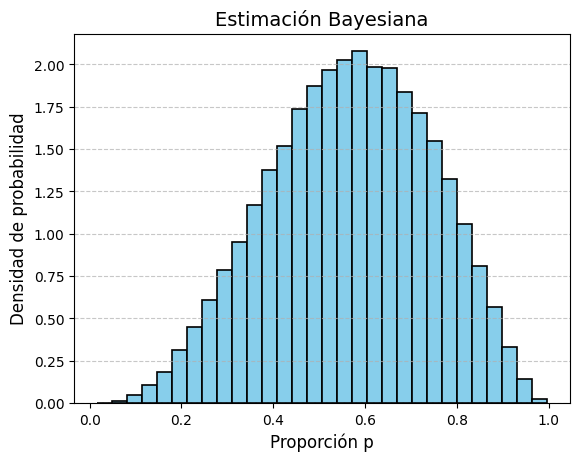

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import emcee

# Datos observados
data = np.array([1, 0, 1, 1, 0])

# Logaritmo de la función de verosimilitud
def log_likelihood(theta, data):
    p = theta
    n = len(data)
    successes = np.sum(data)
    failures = n - successes
    if p < 0 or p > 1:
        return -np.inf
    if successes == 0 or failures == 0:
        return 0
    return successes * np.log(p) + failures * np.log(1 - p)

# Logaritmo del prior
def log_prior(theta):
    if 0 <= theta <= 1:
        return 0
    return -np.inf

# Logaritmo del posterior
def log_posterior(theta, data):
    return log_prior(theta) + log_likelihood(theta, data)

# Muestreo de cadenas de Markov
ndim = 1  # Número de dimensiones del espacio de parámetros
nwalkers = 100  # Número de caminantes
nsteps = 2000  # Número de pasos

# Posición inicial aleatoria de los caminantes
p0 = np.random.rand(nwalkers, ndim)

# Creación del objeto de sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[data])

# Ejecución del sampler
sampler.run_mcmc(p0, nsteps)

# Obtención de las muestras de la distribución posterior
samples = sampler.chain[:, :, 0].reshape(-1)

# Gráfica del histograma de las muestras
plt.hist(samples, bins=30, density=True, color='skyblue', edgecolor='black', linewidth=1.2)
plt.xlabel('Proporción p', fontsize=12)
plt.ylabel('Densidad de probabilidad', fontsize=12)
plt.title('Estimación Bayesiana', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## **Estimación a priori triangular**

La estimación a priori triangular es un enfoque utilizado en la estimación bayesiana donde se utiliza una distribución triangular como distribución a priori para el parámetro de interés. La distribución triangular se caracteriza por tener un valor mínimo, un valor máximo y un valor modal dentro de ese rango.

La distribución triangular es especialmente útil cuando se dispone de información limitada o se desea expresar ciertas creencias o conocimientos previos sobre el parámetro en cuestión. Esta distribución permite expresar una incertidumbre razonable en torno al valor del parámetro, asignando mayor densidad de probabilidad en la región modal y disminuyendo gradualmente hacia los valores mínimos y máximos.

A continuación, se muestra un ejemplo de cómo implementar la estimación a priori triangular en Python utilizando la biblioteca `numpy` y `matplotlib` para generar gráficas:

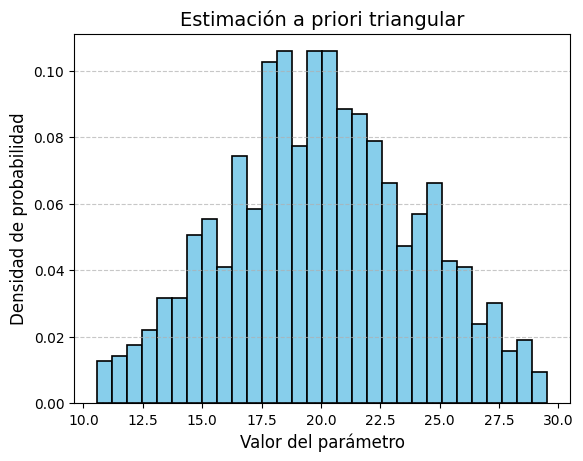

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la distribución triangular
a = 10  # Valor mínimo
b = 30  # Valor máximo
c = 20  # Valor modal

# Generar una muestra de la distribución triangular
samples = np.random.triangular(left=a, mode=c, right=b, size=1000)

# Gráfico del histograma de las muestras
plt.hist(samples, bins=30, density=True, color='skyblue', edgecolor='black', linewidth=1.2)
plt.xlabel('Valor del parámetro', fontsize=12)
plt.ylabel('Densidad de probabilidad', fontsize=12)
plt.title('Estimación a priori triangular', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

En este ejemplo, se utilizan los parámetros `a`, `b` y `c` para definir la forma de la distribución triangular. a representa el valor mínimo, `b` representa el valor máximo y `c` representa el valor modal. La función `np.random.triangular()` genera una muestra aleatoria de la distribución triangular con los parámetros especificados.

El gráfico resultante muestra el histograma de las muestras generadas, donde se puede observar la densidad de probabilidad en torno al valor modal y cómo disminuye gradualmente hacia los valores mínimos y máximos.

Esta estimación a priori triangular puede utilizarse como base para realizar estimaciones bayesianas posteriores, actualizando la distribución a medida que se disponga de datos observados y aplicando el teorema de Bayes para obtener la distribución posterior.

## **La función de verosimilitud binomial**

La función de verosimilitud binomial se utiliza para modelar la probabilidad de observar un número específico de éxitos en un número fijo de ensayos independientes, donde cada ensayo tiene dos posibles resultados: éxito o fracaso. Es especialmente útil cuando se trabaja con datos de conteo o proporciones.

La función de verosimilitud binomial se define matemáticamente como:

$L(p; n, k) = (n choose k) * p^k * (1 - p)^{n - k}$

Donde:

* $L(p; n, k)$ es la función de verosimilitud binomial para un parámetro $p$ dado un número de ensayos $n$ y un número de éxitos $k$.
* $(n choose k)$ es el coeficiente binomial, que representa el número de formas diferentes en las que se pueden seleccionar $k$ éxitos de $n$ ensayos.
* $p^k$ es la probabilidad de obtener $k$ éxitos.
* $(1 - p)^{n - k}$ es la probabilidad de obtener $n - k$ fracasos.

La función de verosimilitud binomial puede utilizarse para estimar el parámetro $p$, que representa la probabilidad de éxito en cada ensayo. La idea es encontrar el valor de $p$ que maximice la función de verosimilitud, lo cual se puede hacer mediante técnicas de optimización.

A continuación, se muestra un ejemplo de cómo calcular y graficar la función de verosimilitud binomial en Python:

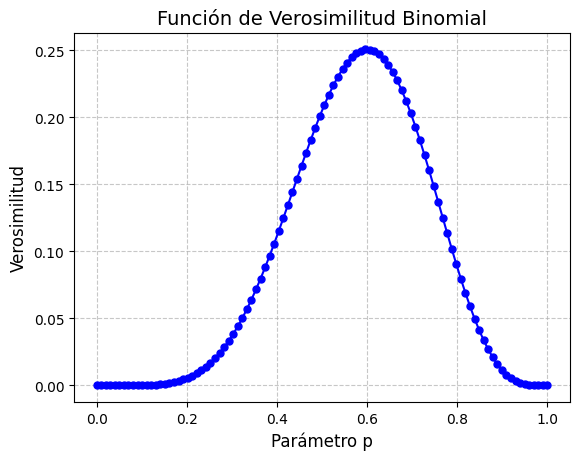

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Parámetros
n = 10  # Número de ensayos
k = 6  # Número de éxitos

# Valores de p
p_values = np.linspace(0, 1, 100)

# Cálculo de la función de verosimilitud binomial
likelihood = comb(n, k) * p_values**k * (1 - p_values)**(n - k)

# Gráfico de la función de verosimilitud binomial
plt.plot(p_values, likelihood, color='blue', linestyle='-', marker='o', markersize=5)
plt.xlabel('Parámetro p', fontsize=12)
plt.ylabel('Verosimilitud', fontsize=12)
plt.title('Función de Verosimilitud Binomial', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

En este ejemplo, se especifican los valores de $n$ y $k$, que representan el número de ensayos y el número de éxitos observados, respectivamente. Luego, se genera un rango de valores para el parámetro $p$ utilizando `np.linspace()`. A continuación, se calcula la función de verosimilitud binomial para cada valor de $p$ utilizando la fórmula mencionada anteriormente. Finalmente, se grafica la función de verosimilitud en función de los valores de $p$.

El gráfico resultante muestra cómo varía la verosimilitud a medida que se modifican los valores de $p$. El valor de $p$ que maximice la función de verosimilitud se considera como la estimación más probable del parámetro $p$ dado los datos observados $n$ y $k$.

## **Estadísticas bayesianas**

Las estadísticas bayesianas son un enfoque de análisis estadístico que se basa en el teorema de Bayes para actualizar y calcular la probabilidad de diferentes hipótesis o valores desconocidos a medida que se obtienen datos observados. A diferencia de las estadísticas clásicas, que se centran en estimaciones puntuales y en el uso de valores fijos para los parámetros, las estadísticas bayesianas tratan los parámetros como variables aleatorias y utilizan distribuciones de probabilidad para describir la incertidumbre sobre estos parámetros.

El enfoque bayesiano se basa en tres elementos clave: el prior, la verosimilitud y el posterior. El prior representa la creencia inicial o la información previa sobre los parámetros antes de observar los datos. La verosimilitud representa la probabilidad de observar los datos dados los parámetros. Y el posterior es la actualización de la creencia inicial sobre los parámetros después de observar los datos, calculado mediante el teorema de Bayes.

![Estadísticas bayesianas](../img/Estad%C3%ADsticas%20bayesianas.jpg "Estadísticas bayesianas")

En resumen, las estadísticas bayesianas proporcionan un marco teórico y computacional para realizar inferencias probabilísticas sobre los parámetros desconocidos en función de los datos observados y las creencias iniciales. Este enfoque permite una representación más completa de la incertidumbre y puede ser especialmente útil cuando se dispone de poca información previa o cuando se necesitan actualizaciones secuenciales a medida que se obtienen nuevos datos.

## **Tamaños de muestra**

El tamaño de muestra se refiere al número de observaciones o individuos que se incluyen en un estudio o experimento. Es un concepto fundamental en la estadística, ya que el tamaño de muestra afecta la precisión y confiabilidad de los resultados obtenidos.

En general, un tamaño de muestra más grande tiende a producir estimaciones más precisas y confiables, ya que proporciona más información sobre la población en estudio. Por otro lado, un tamaño de muestra más pequeño puede llevar a estimaciones menos precisas y más propensas a variaciones aleatorias.

Para ilustrar esto, consideremos un ejemplo en el que queremos estimar la media de una población. Supongamos que la población real tiene una media de 10 y una desviación estándar de 2. Vamos a generar una muestra aleatoria de diferentes tamaños y calcular la media muestral en cada caso:

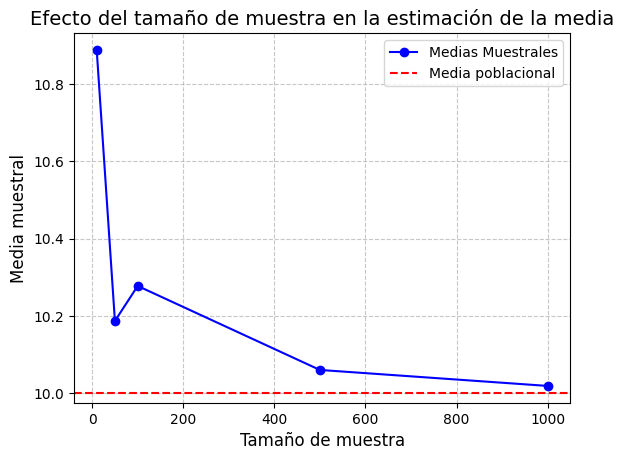

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la población
media_poblacion = 10
desviacion_poblacion = 2

# Tamaños de muestra a evaluar
tamaños_muestra = [10, 50, 100, 500, 1000]

# Listas para almacenar las medias muestrales
medias_muestrales = []

# Generación de las muestras y cálculo de las medias muestrales
for tamaño in tamaños_muestra:
    muestra = np.random.normal(media_poblacion, desviacion_poblacion, tamaño)
    media_muestral = np.mean(muestra)
    medias_muestrales.append(media_muestral)

# Gráfica de las medias muestrales en función del tamaño de muestra
plt.plot(tamaños_muestra, medias_muestrales, marker='o', linestyle='-', color='blue', label='Medias Muestrales')
plt.axhline(y=media_poblacion, color='red', linestyle='--', label='Media poblacional')
plt.xlabel('Tamaño de muestra', fontsize=12)
plt.ylabel('Media muestral', fontsize=12)
plt.title('Efecto del tamaño de muestra en la estimación de la media', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

En el código anterior, generamos muestras aleatorias de una distribución normal con media 10 y desviación estándar 2 para diferentes tamaños de muestra. Luego, calculamos la media muestral para cada muestra y graficamos las medias muestrales en función del tamaño de muestra. También agregamos una línea punteada roja que representa la media poblacional real.

Al ejecutar el código, observarás que a medida que aumenta el tamaño de muestra, las medias muestrales tienden a acercarse más a la media poblacional. Esto ilustra el efecto del tamaño de muestra en la precisión de la estimación. Con un tamaño de muestra pequeño, las medias muestrales pueden variar más ampliamente alrededor de la media poblacional, mientras que con un tamaño de muestra grande, las medias muestrales son más precisas y se acercan más a la media poblacional.

En resumen, el tamaño de muestra es un factor crucial en la inferencia estadística. Un tamaño de muestra adecuado garantiza resultados más precisos y confiables. Es importante seleccionar el tamaño de muestra de acuerdo con los objetivos del estudio, el nivel de precisión deseado y las limitaciones de recursos disponibles.

## **Sensibilidad y ley de potencia para la distribución a priori**

La sensibilidad y la ley de potencia son conceptos relacionados con la elección de la distribución a priori en estadística bayesiana.

La sensibilidad se refiere a la influencia que tiene la distribución a priori en la distribución posterior. Una distribución a priori sensible es aquella que tiene un impacto significativo en la distribución posterior, es decir, afecta en gran medida la forma y los parámetros de la distribución posterior. Por otro lado, una distribución a priori no sensible tiene poco impacto en la distribución posterior.

La ley de potencia, también conocida como ley de Pareto, es una propiedad matemática que describe la relación entre la distribución a priori y la distribución posterior en ciertos casos. Esta ley establece que si la distribución a priori es de cola pesada o de larga cola, entonces la distribución posterior también será de cola pesada. En otras palabras, una distribución a priori con valores extremos o colas pesadas conducirá a una distribución posterior con valores extremos o colas pesadas.

Para ilustrar estos conceptos, consideremos un ejemplo en el que queremos estimar la probabilidad de éxito de un evento binomial. Supongamos que tenemos datos observados de 10 éxitos y 5 fracasos. Queremos utilizar el análisis bayesiano para estimar la probabilidad de éxito, pero estamos indecisos sobre la elección de la distribución a priori.

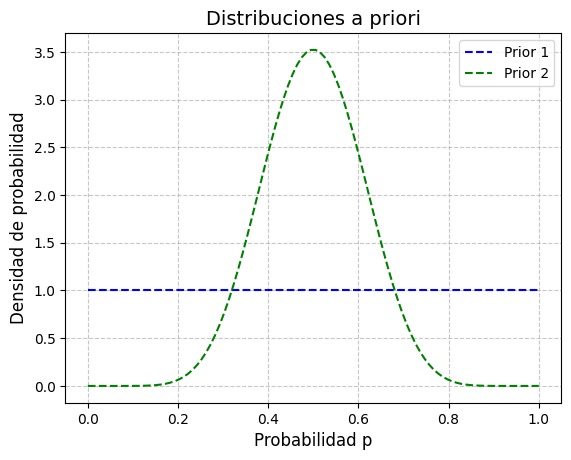

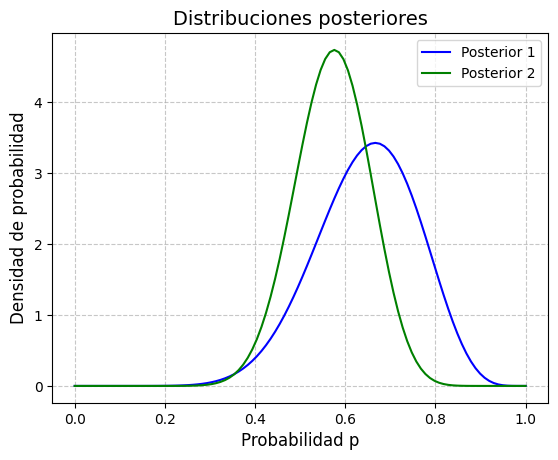

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Datos observados
num_exitos = 10
num_fracasos = 5

# Distribución a priori 1
prior_alpha1 = 1
prior_beta1 = 1

# Distribución a priori 2
prior_alpha2 = 10
prior_beta2 = 10

# Generación de valores de p
p_values = np.linspace(0, 1, 100)

# Cálculo de las distribuciones a priori
prior_density1 = beta.pdf(p_values, prior_alpha1, prior_beta1)
prior_density2 = beta.pdf(p_values, prior_alpha2, prior_beta2)

# Cálculo de las distribuciones posteriores
posterior_alpha1 = prior_alpha1 + num_exitos
posterior_beta1 = prior_beta1 + num_fracasos
posterior_density1 = beta.pdf(p_values, posterior_alpha1, posterior_beta1)

posterior_alpha2 = prior_alpha2 + num_exitos
posterior_beta2 = prior_beta2 + num_fracasos
posterior_density2 = beta.pdf(p_values, posterior_alpha2, posterior_beta2)

# Gráfica de las distribuciones a priori
plt.plot(p_values, prior_density1, label='Prior 1', color='blue', linestyle='--')
plt.plot(p_values, prior_density2, label='Prior 2', color='green', linestyle='--')
plt.xlabel('Probabilidad p', fontsize=12)
plt.ylabel('Densidad de probabilidad', fontsize=12)
plt.title('Distribuciones a priori', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Gráfica de las distribuciones posteriores
plt.plot(p_values, posterior_density1, label='Posterior 1', color='blue')
plt.plot(p_values, posterior_density2, label='Posterior 2', color='green')
plt.xlabel('Probabilidad p', fontsize=12)
plt.ylabel('Densidad de probabilidad', fontsize=12)
plt.title('Distribuciones posteriores', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

En el código anterior, consideramos dos distribuciones a priori diferentes: una distribución uniforme (Prior 1) y una distribución beta con parámetros iguales (Prior 2). Calculamos las distribuciones posteriores utilizando la fórmula de actualización bayesiana y graficamos tanto las distribuciones a priori como las distribuciones posteriores.

Al ejecutar el código, verás que las distribuciones a priori influyen en las distribuciones posteriores. En el caso de la distribución a priori uniforme (Prior 1), la distribución posterior es más dispersa y se extiende por un rango más amplio de valores de probabilidad. Esto indica que la elección de una distribución a priori más informada (Prior 2) conlleva a una distribución posterior más precisa y concentrada.

La sensibilidad se refiere a cómo los resultados posteriores cambian en función de la elección de la distribución a priori. En este ejemplo, podemos observar que las distribuciones posteriores difieren significativamente según la elección de la distribución a priori. Esto muestra la sensibilidad de los resultados al prior seleccionado.

La ley de potencia se refiere a la capacidad de la distribución a priori para actualizar y cambiar las creencias iniciales. En el caso de la distribución a priori uniforme (Prior 1), la actualización es más fuerte, ya que la información de los datos observados tiene un mayor impacto en la distribución posterior. Por otro lado, en el caso de la distribución a priori más informada (Prior 2), la actualización es más suave, ya que la distribución a priori tiene más influencia en la distribución posterior.

En resumen, la sensibilidad y la ley de potencia son conceptos importantes en el análisis bayesiano y están relacionados con la elección de la distribución a priori. La sensibilidad nos muestra cómo los resultados posteriores pueden variar según el prior seleccionado, y la ley de potencia nos indica la capacidad de la distribución a priori para actualizar las creencias iniciales. La elección de la distribución a priori debe basarse en el conocimiento experto y las características del problema en estudio.

## **Intervalos creíbles**

Los intervalos creíbles son una herramienta clave en el análisis bayesiano para estimar la incertidumbre en los resultados. A diferencia de los intervalos de confianza en el enfoque frecuentista, los intervalos creíbles brindan una forma directa de cuantificar la incertidumbre en términos de la probabilidad posterior.

Para ilustrar esto, consideremos un ejemplo en el que queremos estimar la probabilidad de éxito de un evento binomial. Supongamos que tenemos datos observados de 10 éxitos y 5 fracasos. Utilizaremos la distribución a priori beta y generaremos intervalos creíbles para la probabilidad de éxito.

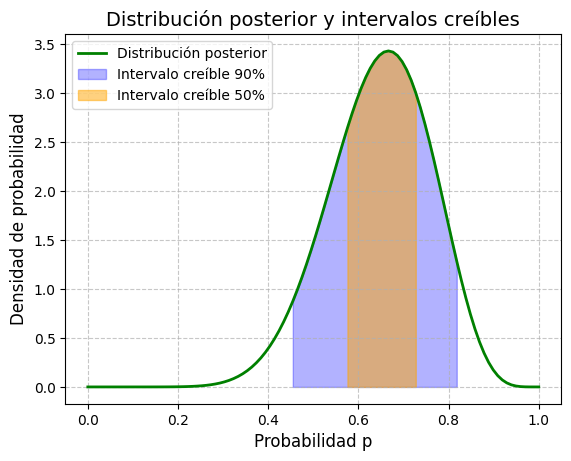

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Datos observados
num_exitos = 10
num_fracasos = 5

# Distribución a priori beta
prior_alpha = 1
prior_beta = 1

# Generación de valores de p
p_values = np.linspace(0, 1, 100)

# Cálculo de la distribución posterior
posterior_alpha = prior_alpha + num_exitos
posterior_beta = prior_beta + num_fracasos
posterior_density = beta.pdf(p_values, posterior_alpha, posterior_beta)

# Cálculo de los intervalos creíbles
credible_interval_90 = beta.ppf([0.05, 0.95], posterior_alpha, posterior_beta)
credible_interval_50 = beta.ppf([0.25, 0.75], posterior_alpha, posterior_beta)

# Gráfica de la distribución posterior y los intervalos creíbles
plt.plot(p_values, posterior_density, label='Distribución posterior', color='green', linewidth=2)
plt.fill_between(p_values, 0, posterior_density, where=((p_values >= credible_interval_90[0]) & (p_values <= credible_interval_90[1])), alpha=0.3, color='blue', label='Intervalo creíble 90%')
plt.fill_between(p_values, 0, posterior_density, where=((p_values >= credible_interval_50[0]) & (p_values <= credible_interval_50[1])), alpha=0.5, color='orange', label='Intervalo creíble 50%')
plt.xlabel('Probabilidad p', fontsize=12)
plt.ylabel('Densidad de probabilidad', fontsize=12)
plt.title('Distribución posterior y intervalos creíbles', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

En el código anterior, calculamos la distribución posterior utilizando la fórmula de actualización bayesiana y generamos la distribución posterior utilizando la distribución beta. Luego, calculamos los intervalos creíbles utilizando la función `beta.ppf` de SciPy. En este ejemplo, generamos intervalos creíbles del 90% y del 50%.

Al ejecutar el código, se muestra la distribución posterior y los intervalos creíbles en la gráfica. El intervalo creíble del 90% está sombreado en azul y cubre el 90% de la densidad posterior, mientras que el intervalo creíble del 50% está sombreado en naranja y cubre el 50% de la densidad posterior. Estos intervalos creíbles brindan una estimación de la incertidumbre en la probabilidad de éxito.

En resumen, los intervalos creíbles en el análisis bayesiano proporcionan una forma directa de cuantificar la incertidumbre en los resultados en términos de probabilidades. Permiten estimar rangos de valores plausibles y brindan una herramienta útil para la toma de decisiones informadas.

## **A priori informativa**

En el análisis bayesiano, una distribución a priori informativa se refiere a una distribución prior que tiene un impacto significativo en la distribución posterior. A diferencia de una distribución a priori no informativa, que asigna una probabilidad uniforme a todas las posibilidades, una distribución a priori informativa se utiliza cuando se dispone de información previa o conocimiento experto sobre el problema en cuestión.

En Python, podemos ilustrar el uso de una distribución a priori informativa utilizando el mismo ejemplo de estimación de la probabilidad de éxito de un evento binomial. Supongamos que, en lugar de una distribución a priori no informativa `(beta(1, 1))`, tenemos información previa que sugiere que la probabilidad de éxito es más probable que se encuentre cerca de 0.7. En este caso, podríamos utilizar una distribución beta con parámetros (7, 3) como nuestra distribución a priori informativa.

A continuación se muestra un ejemplo de código que muestra cómo se puede incorporar una distribución a priori informativa en el análisis bayesiano:

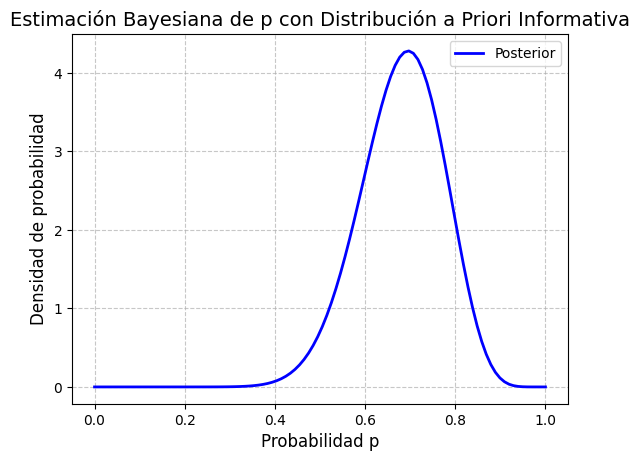

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Datos observados
num_exitos = 10
num_fracasos = 5

# Distribución a priori informativa (beta(7, 3))
prior_alpha = 7
prior_beta = 3

# Generación de valores de p
p_values = np.linspace(0, 1, 100)

# Cálculo de la distribución posterior
posterior_alpha = prior_alpha + num_exitos
posterior_beta = prior_beta + num_fracasos
posterior_density = beta.pdf(p_values, posterior_alpha, posterior_beta)

# Gráfica de la distribución posterior
plt.plot(p_values, posterior_density, color='blue', linestyle='-', linewidth=2, label='Posterior')
plt.xlabel('Probabilidad p', fontsize=12)
plt.ylabel('Densidad de probabilidad', fontsize=12)
plt.title('Estimación Bayesiana de p con Distribución a Priori Informativa', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

En este ejemplo, hemos establecido la distribución a priori con parámetros (7, 3), lo que indica que creemos que la probabilidad de éxito está más cerca de 0.7. Al calcular la distribución posterior, incorporamos tanto la información previa como los datos observados.

Al ejecutar el código, se mostrará la distribución posterior que tiene en cuenta tanto la información previa como los datos observados. La forma de la distribución posterior estará influenciada por la distribución a priori informativa, y reflejará la combinación de la información previa y los datos observados.

En resumen, una distribución a priori informativa en el análisis bayesiano se utiliza cuando se tiene información previa o conocimiento experto sobre el problema, y puede tener un impacto significativo en la distribución posterior. Esto permite incorporar de manera más efectiva la información disponible en la estimación y toma de decisiones.

| **Inicio** | **atrás 1** | **Siguiente 3** |
|----------- |-------------- |---------------|
| [🏠](../../../README.md) | [⏪](./1.TEOREMA_DE_BAYES.ipynb)| [⏩](./3.OPERACIONES_BAYESIANAS.ipynb)|